In [11]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import decomposition

In [2]:
salinas = np.load('salinas.npy', allow_pickle=True)
print(salinas.shape)

(512, 217, 204)


In [55]:
salinasRGB = np.array(salinas[:, :, [30, 15, 2]], dtype=float)

pmin,pmax = np.percentile(salinasRGB, (1,99), axis=(0,1))
print(pmin, pmax)
salinasRGB_pimped = salinasRGB.copy()

for i in range(pmin.size):
    salinasRGB_pimped[:,:,i] = (salinasRGB[:,:,i] - pmin[i]) / (pmax[i] - pmin[i])

salinasRGB_pimped[salinasRGB_pimped < 0] = 0
salinasRGB_pimped[salinasRGB_pimped > 1] = 1

[ 600. 1045.  474.] [3747. 3107.  927.]


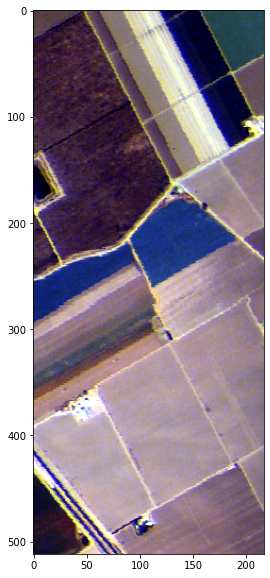

In [57]:
plt.figure(figsize=(20,10))
plt.imshow(salinasRGB_pimped)
plt.show()

In [22]:
X = salinas.reshape((-1, 204))
print(X.shape)

(111104, 204)


In [24]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [25]:
X_pca = pca.transform(X)
print(X_pca.shape)